# 1. Data Import & Review

## Overview
This notebook loads and explores the **COGS, PropBank, and Universal Dependencies datasets**.

## Checkpoints
- 1A: Dataset format validation
- 1B: Exploratory statistics & visualizations


In [9]:
# Ensure the repository is cloned
!git clone https://github.com/cmhobbs96/meta-semantic-research.git

# Install required libraries (if not installed)
!pip install datasets pandas matplotlib seaborn

# Import standard libraries
import pandas as pd
import os

# Define path to COGS dataset
cogs_path = "/content/meta-semantic-research/data/COGS"

if os.path.exists(cogs_path):
    print(f"Path '{cogs_path}' exists.")
else:
    print(f"Path '{cogs_path}' does not exist.")

# Load dataset splits
train_path = os.path.join(cogs_path, "train.tsv")
dev_path = os.path.join(cogs_path, "dev.tsv")
test_path = os.path.join(cogs_path, "test.tsv")
gen_path = os.path.join(cogs_path, "gen.tsv")

# Read files
train_df = pd.read_csv(train_path, sep="\t", names=["Sentence", "LogicalForm"])
dev_df = pd.read_csv(dev_path, sep="\t", names=["Sentence", "LogicalForm"])
test_df = pd.read_csv(test_path, sep="\t", names=["Sentence", "LogicalForm"])
gen_df = pd.read_csv(gen_path, sep="\t", names=["Sentence", "LogicalForm"])

# Display sample rows
train_df.head()

Cloning into 'meta-semantic-research'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 26 (delta 8), reused 16 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 1.80 MiB | 25.54 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Path '/content/meta-semantic-research/data/COGS' exists.


,Sentence,LogicalForm
A rose was helped by a dog .,"rose ( x _ 1 ) AND help . theme ( x _ 3 , x _ ...",in_distribution
The sailor dusted a boy .,"* sailor ( x _ 1 ) ; dust . agent ( x _ 2 , x ...",in_distribution
Emma rolled a teacher .,"roll . agent ( x _ 1 , Emma ) AND roll . theme...",in_distribution
Evelyn rolled the girl .,"* girl ( x _ 3 ) ; roll . agent ( x _ 1 , Evel...",in_distribution
A cake was forwarded to Levi by Charlotte .,"cake ( x _ 1 ) AND forward . theme ( x _ 3 , x...",in_distribution


In [10]:
# Display dataset sizes
dataset_sizes = {
    "Train": len(train_df),
    "Dev": len(dev_df),
    "Test": len(test_df),
    "Generalization": len(gen_df)
}
dataset_sizes


{'Train': 24155, 'Dev': 3000, 'Test': 3000, 'Generalization': 21000}

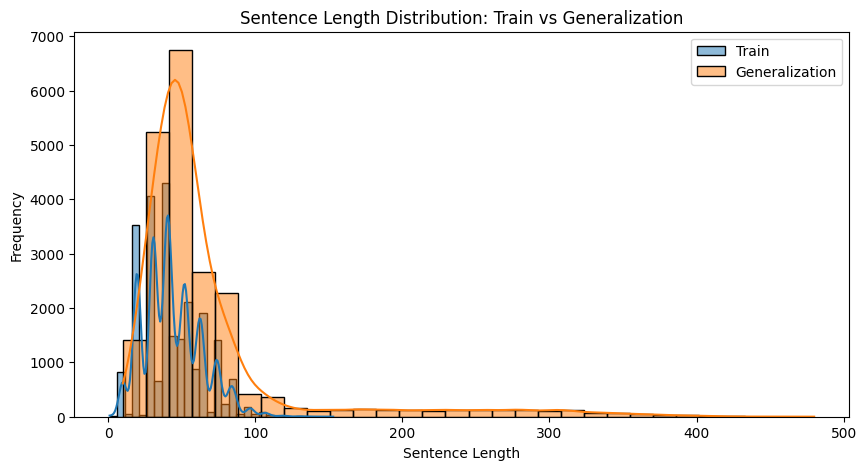

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute sentence length
train_df["SentenceLength"] = train_df["Sentence"].apply(lambda x: len(str(x).split()))
gen_df["SentenceLength"] = gen_df["Sentence"].apply(lambda x: len(str(x).split()))

# Plot distribution
plt.figure(figsize=(10,5))
sns.histplot(train_df["SentenceLength"], label="Train", kde=True, bins=30)
sns.histplot(gen_df["SentenceLength"], label="Generalization", kde=True, bins=30)
plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.legend()
plt.title("Sentence Length Distribution: Train vs Generalization")
plt.show()


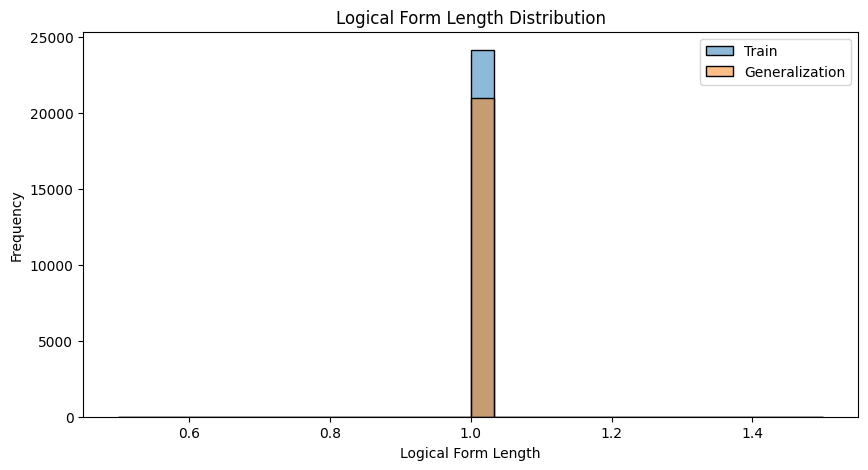

In [12]:
# Compare logical form lengths
train_df["LogicalFormLength"] = train_df["LogicalForm"].apply(lambda x: len(str(x).split()))
gen_df["LogicalFormLength"] = gen_df["LogicalForm"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,5))
sns.histplot(train_df["LogicalFormLength"], label="Train", kde=True, bins=30)
sns.histplot(gen_df["LogicalFormLength"], label="Generalization", kde=True, bins=30)
plt.xlabel("Logical Form Length")
plt.ylabel("Frequency")
plt.legend()
plt.title("Logical Form Length Distribution")
plt.show()
